In [ ]:
library(readxl)
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [ ]:
dfA <- read_excel("/data1/project/proj1.xlsx",col_names=TRUE,sheet="A")
dfA

dfB <- read_excel("/data1/project/proj1.xlsx",col_names=TRUE,sheet="B")
dfB

dfC <- read_excel("/data1/project/proj1.xlsx",col_names=TRUE,sheet="C")
dfC

gtf,chr2,chr7,chr18,chrY
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
GENCODE,884752,587538,177110,6281
T2T,896117,586339,181230,6396
Refseq,999572,818577,166476,6959


gtf,chr2,chr7,chr18,chrY
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
GENCODE,841888,621823,146640,7233
T2T,842432,620450,143594,18755
Refseq,841888,621823,146640,7233


gtf,chr2,chr7,chr18,chrY,threshold
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
GENCODE,1275,922,275,36,1
GENCODE,885,670,184,17,5
GENCODE,755,566,157,12,10
GENCODE,424,299,78,4,50
T2T,1283,931,275,53,1
T2T,887,656,182,25,5
T2T,755,560,156,21,10
T2T,424,301,78,9,50
Refseq,1297,947,272,32,1


In [ ]:
# 绘图比较的时候x轴为gtf注释类型（行）、y轴为count（列），所以需要长宽数据格式转化，宽数据格式转换为长数据格式
dfA %>% pivot_longer(cols=c(chr2,chr7,chr18,chrY),names_to = "chr_type", values_to = "count") 

gtf,chr_type,count
<chr>,<chr>,<dbl>
GENCODE,chr2,884752
GENCODE,chr7,587538
GENCODE,chr18,177110
GENCODE,chrY,6281
T2T,chr2,896117
T2T,chr7,586339
T2T,chr18,181230
T2T,chrY,6396
Refseq,chr2,999572


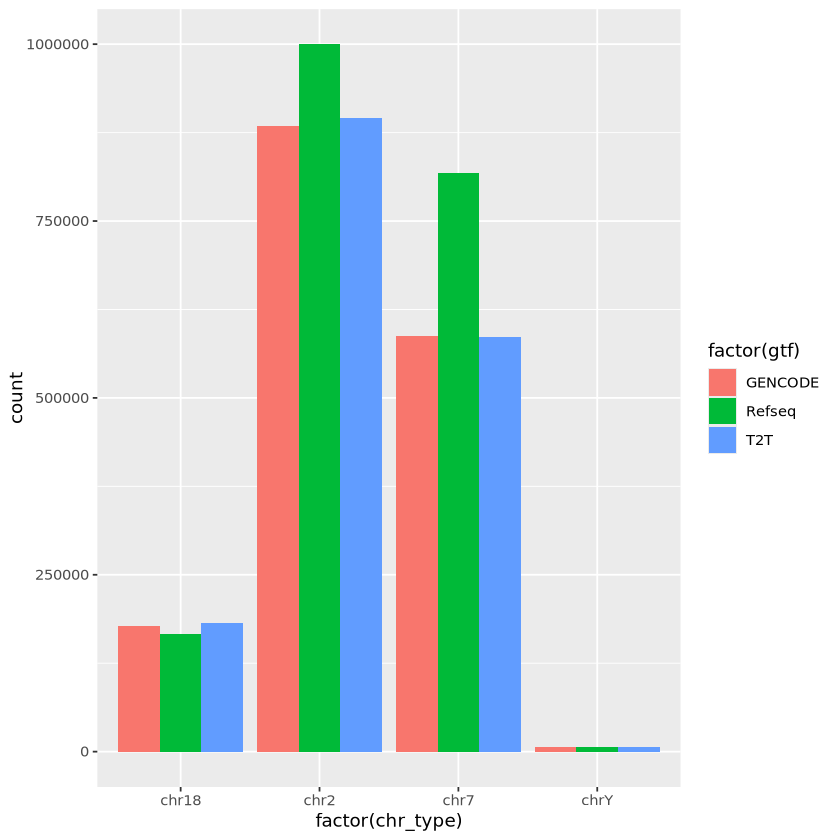

In [ ]:
dfA %>% 
  pivot_longer(cols = c(chr2, chr7, chr18, chrY), 
               names_to = "chr_type", 
               values_to = "count") %>%
  ggplot(aes(x = factor(chr_type), y = count, fill = factor(gtf))) +
  geom_col(position = "dodge")

Warning message:
“`position_dodge()` requires non-overlapping x intervals.”


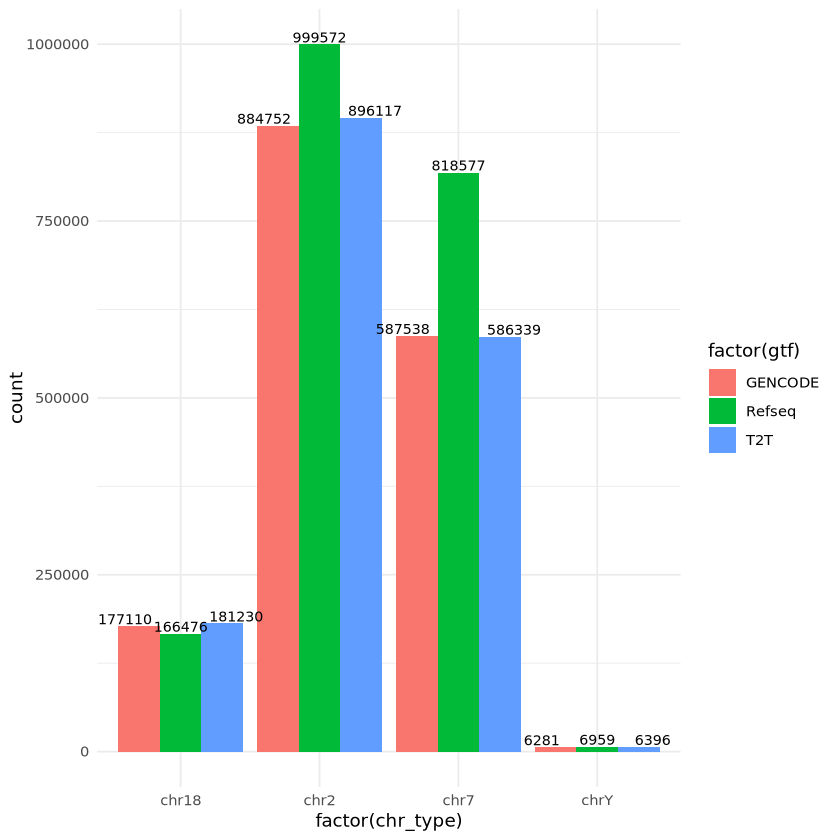

In [ ]:
dfA %>% 
  pivot_longer(cols = c(chr2, chr7, chr18, chrY), 
               names_to = "chr_type", 
               values_to = "count") %>%
  ggplot(aes(x = factor(chr_type), y = count, fill = factor(gtf))) +
  geom_col(position = "dodge") +
  geom_text(aes(label = count), 
            position = position_dodge(width = 1.2), 
            vjust = -0.2, 
            size = 3) +
  theme_minimal()

In [ ]:
dfB

gtf,chr2,chr7,chr18,chrY
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
GENCODE,841888,621823,146640,7233
T2T,842432,620450,143594,18755
Refseq,841888,621823,146640,7233


Warning message:
“`position_dodge()` requires non-overlapping x intervals.”


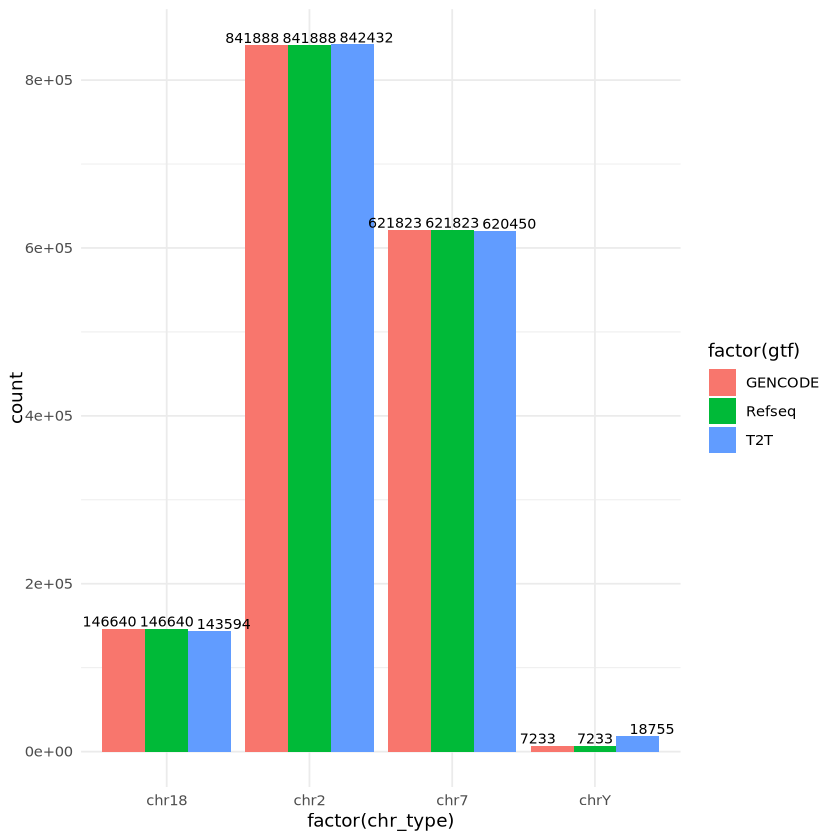

In [ ]:
dfB %>% 
  pivot_longer(cols = c(chr2, chr7, chr18, chrY), 
               names_to = "chr_type", 
               values_to = "count") %>%
  ggplot(aes(x = factor(chr_type), y = count, fill = factor(gtf))) +
  geom_col(position = "dodge") +
  geom_text(aes(label = count), 
            position = position_dodge(width = 1.2), 
            vjust = -0.2, 
            size = 3) +
  theme_minimal()

In [ ]:
dfC

gtf,chr2,chr7,chr18,chrY,threshold
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
GENCODE,1275,922,275,36,1
GENCODE,885,670,184,17,5
GENCODE,755,566,157,12,10
GENCODE,424,299,78,4,50
T2T,1283,931,275,53,1
T3T,887,656,182,25,5
T4T,755,560,156,21,10
T5T,424,301,78,9,50
Refseq,1297,947,272,32,1


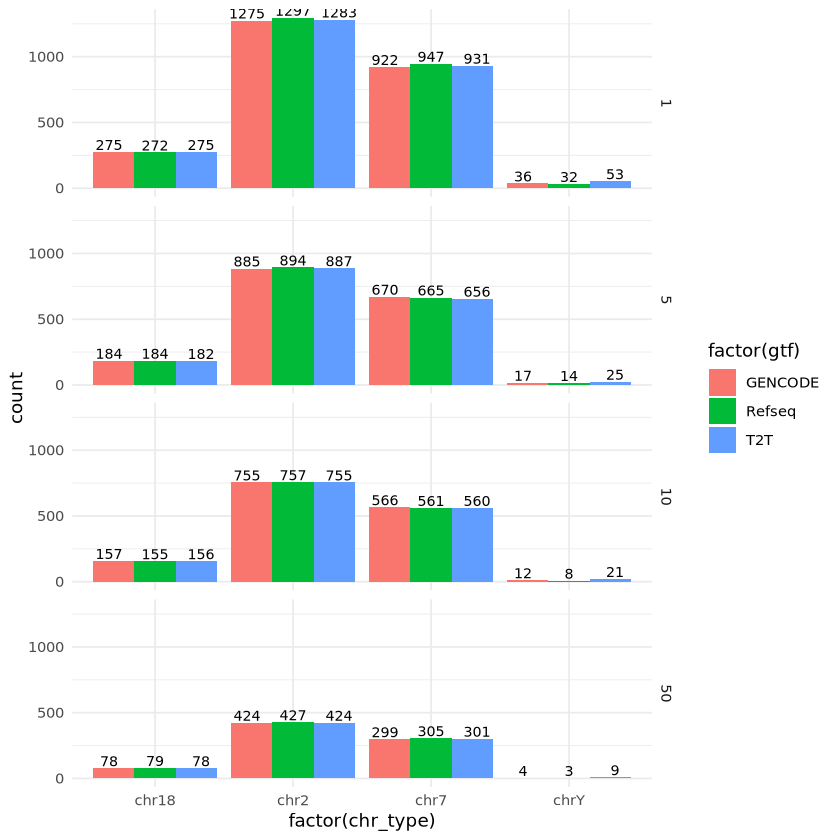

In [ ]:
dfC %>% 
  pivot_longer(cols = c(chr2, chr7, chr18, chrY), 
               names_to = "chr_type", 
               values_to = "count") %>%
  ggplot(aes(x = factor(chr_type), y = count, fill = factor(gtf))) +
  geom_col(position = "dodge") +
  geom_text(aes(label = count), 
            position = position_dodge(width = 1), 
            vjust = -0.2, 
            size = 3) +
  theme_minimal()+facet_grid(vars(threshold))

In [1]:
dict1={}
dict1["s1"]="AKDEHRRRRR"
dict1["s2"]="KIYRRSAAAA"

In [15]:
import numpy as np
startprob = np.zeros(3)
for seq in dict1.values():
    first_aa = seq[0]
    startprob[priori_aa_to_hidden_state[first_aa]] += 1


In [26]:
[ [0 if i in ["K","R","H"] else (1 if i in ["D","E"] else 2) ] for i in "Y" ]

[[2]]